In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [43]:
from importlib import reload

In [42]:
import drivers

In [104]:
def get_vna_trace(vna, amp=True):
    vna.prepare_for_stb()
    vna.sweep_single()
    vna.wait_for_stb()
    return vna.get_frequencies(), 20*log10(vna.get_tracedata()[0]) if amp  \
                    else unwrap(pna_l.get_tracedata()[1])+(pna_l.get_frequencies()-pna_l.get_frequencies()[0])*59.3e-9

## Keithley K2400 source meter

In [1]:
from drivers.k2400 import K2400

In [2]:
curr = K2400("k2400")

In [3]:
curr.set_mode("CURR")

In [4]:
curr.get_mode()

'CURR'

In [5]:
curr.get_current()

1e-05

In [11]:
curr.set_current(10e-6)

In [9]:
curr.set_voltage_compliance(2)

In [10]:
curr.get_voltage_compliance()

'2.000000E+00'

In [13]:
curr.output_off()

## Agilent E8257D

In [3]:
mw_src = E8257D("MXG")

In [4]:
mw_src.set_frequency(5e9)

In [5]:
mw_src.get_frequency()

5000000000.0

In [7]:
mw_src.set_output_state("ON")

In [32]:
mw_src.get_output_state()

'1\n'

In [36]:
mw_src.set_power(10)

##  PNA-L

In [71]:
reload(drivers.Agilent_PNA_L)
from drivers.Agilent_PNA_L import Agilent_PNA_L

In [72]:
pna_l = Agilent_PNA_L("PNA-L", "PNA-L-2")

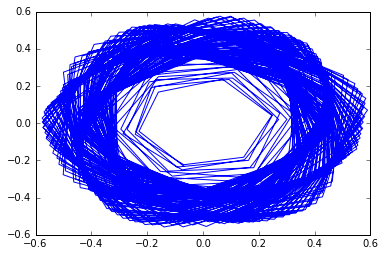

In [23]:
plt.plot(real(pna_l.get_sdata()), imag(pna_l.get_sdata()))

In [45]:
pna_l.sweep_hold()

In [57]:
pna_l.set_bandwidth(500)

True

In [46]:
pna_l.set_averages(10)

True

In [47]:
pna_l._visainstrument.query("sens:swe:gro:coun?")

'+10\n'

In [49]:
pna_l._visainstrument.query("sens:swe:mode?")

'HOLD\n'

In [59]:
pna_l.avg_clear()
pna_l.prepare_for_stb()
pna_l.sweep_single()
pna_l.wait_for_stb()

##  Keysight AWG + VNA

In [82]:
reload(drivers.KeysightAWG)
from drivers.KeysightAWG import KeysightAWG, WaveformType
reload(drivers.Agilent_PNA_L)
from drivers.Agilent_PNA_L import Agilent_PNA_L

In [83]:
awg = KeysightAWG("AWG2")
pna_l = Agilent_PNA_L("PNA-L", "PNA-L-2")

In [84]:
pna_l.get_electrical_delay()

6.9776861012e-08

In [113]:
pna_l.set_xlim(4.5e9, 9e9)
pna_l.set_nop(1000)

True

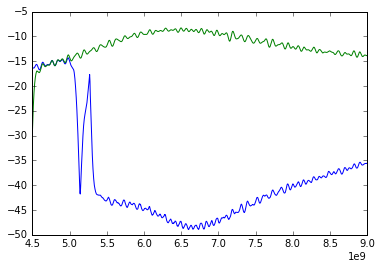

In [114]:
awg.apply_waveform(WaveformType.dc,0,0,0,2)
plt.plot(*get_vna_trace(pna_l))
awg.apply_waveform(WaveformType.dc,0,0,1,2)
plt.plot(*get_vna_trace(pna_l))

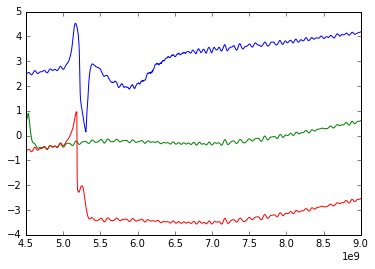

In [109]:
awg.apply_waveform(WaveformType.dc,0,0,0,2)
plt.plot(*get_vna_trace(pna_l, False))
awg.apply_waveform(WaveformType.dc,0,0,1,2)
plt.plot(*get_vna_trace(pna_l, False))
awg.apply_waveform(WaveformType.dc,0,0,-1,2)
plt.plot(*get_vna_trace(pna_l, False))

## Keysight EXA

In [393]:
reload(drivers.Agilent_EXA)
from drivers.Agilent_EXA import *

In [394]:
exa = Agilent_EXA_N9010A("EXA", "EXA")

In [30]:
exa.set_bandwidth(10e3)

True

In [46]:
exa.set_span(0)

True

In [50]:
exa.sweep_single()

In [108]:
exa.set_averages(101)

True

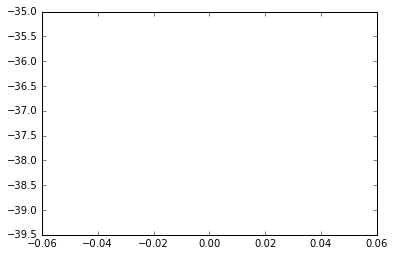

In [374]:
exa.prepare_for_stb()
exa.sweep_single()
exa.wait_for_stb()

plt.plot(exa.get_tracedata())

In [448]:
exa.setup_list_sweep([4.9e9, 5e9, 5.1e9], [1e3]*3)

In [464]:
exa.set_averages(1000)

True

In [465]:
exa.get_averages()

1

In [462]:
exa.prepare_for_stb()
exa.sweep_single()
exa.wait_for_stb()
exa.get_tracedata()

[-32.369773864746094, -37.80207061767578, -19.029415130615234]

In [443]:
exa.setup_swept_sa()

##  Keysight AWG + Keysight EXA + Keysight MWSRC

In [278]:
reload(drivers.Agilent_EXA)
from drivers.Agilent_EXA import *
reload(drivers.KeysightAWG)
from drivers.KeysightAWG import KeysightAWG, WaveformType
reload(drivers.E8257D)
from drivers.E8257D import E8257D

In [279]:
exa = Agilent_EXA_N9010A("EXA", "EXA")
awg = KeysightAWG("AWG2")
mwsrc = E8257D("MXG")

In [280]:
mwsrc.get_power()

10.0

In [387]:
exa.set_nop(1001)
exa.set_centerfreq(5e9)
exa.set_span(10e6)
exa.set_bandwidth(1e4)
exa.set_averages(1)

True

In [202]:
awg.set_2nd_width(10)

True

In [246]:
awg.apply_waveform(WaveformType.dc, 0, 1, 0, 1)
awg.apply_waveform(WaveformType.dc, 0, 1, 0, 2)

In [295]:
awg.set_outp2(0)

True

In [273]:
awg.prepare_waveform(WaveformType.sine, 100e6, 0.5, 0.0, 2)

'0.000000E+00\n'

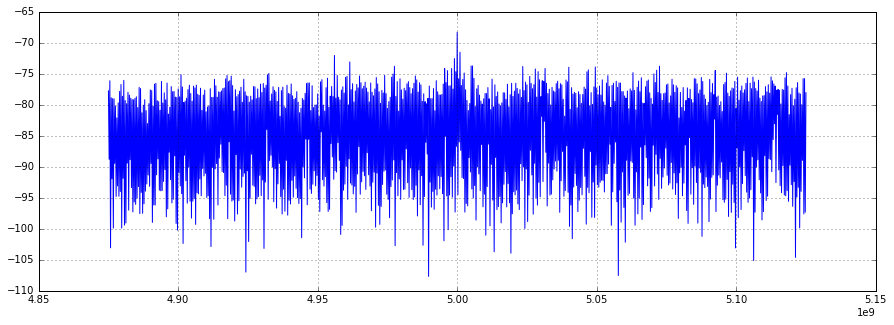

In [284]:
# awg.set_outp1(1)
# awg.set_outp2(1)
exa.prepare_for_stb()
exa.sweep_single()
exa.wait_for_stb()

plt.plot(exa.get_freqpoints(), exa.get_tracedata())

plt.grid()
plt.gcf().set_size_inches(15,5)

In [233]:
awg._visainstrument.query(":SYST:ERR?")

'0,"No error"\n'

In [242]:
awg._visainstrument.write(":FUNC1 SIN; :FREQ1 10e6")

(25, <StatusCode.success: 0>)

In [229]:
awg.apply_waveform(WaveformType.sine, 100e6, 1, 0, 1)

In [227]:
awg.set_1st_delay(0)

True

In [236]:
awg._visainstrument.query(":Freq1?")

'1.00000000000000E+08\n'

In [243]:
awg._visainstrument.query(":FREQ1?")

'1.0000000000000E+07\n'